In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [3]:
#API fra developer.yr.no
def get_weatherJSON(lat, lon):
    return f"https://api.met.no/weatherapi/locationforecast/2.0/compact?lat={lat}&lon={lon}"

In [4]:
# Breddegrad og lengdegrad er hentet for Cecilekruna er hentet fra Google Maps
locations = [
    ("Ceciliekruna", 61.772638, 6.773921),
    ("Paris", 48.854289, 2.342042),
    ("London", 51.501814, -0.140605),
    ("Cape Town", -33.922348, 18.424031),
    ("New York", 40.710676, -74.006219)
]

# Lager en oversiktstabell
data = []
for name, lat, lon in locations:
    data.append([name, lat, lon])

df = pd.DataFrame(data, columns=["Plass", "Breddegrad", "Lengdegrad"])
df.head()


,Plass,Breddegrad,Lengdegrad
0,Ceciliekruna,61.772638,6.773921
1,Paris,48.854289,2.342042
2,London,51.501814,-0.140605
3,Cape Town,-33.922348,18.424031
4,New York,40.710676,-74.006219


In [5]:
url = get_weatherJSON(40.710676, -74.006219)


headers = {
    "User-Agent": "DittNavn/DinEpost"  # Påkrevd av Yr.no
}

response = requests.get(url, headers=headers)
if response.status_code == 200:
    weather_data = response.json()

    # Hente temperaturdata
    timeseries = weather_data["properties"]["timeseries"]
    weather_list = [
        {"time": entry["time"], "temperature": entry["data"]["instant"]["details"]["air_temperature"]}
        for entry in timeseries
    ]

    df = pd.DataFrame(weather_list)
    print(df.head())  # Se de første radene

                   time  temperature
0  2025-03-18T07:00:00Z          1.8
1  2025-03-18T08:00:00Z          1.6
2  2025-03-18T09:00:00Z          1.4
3  2025-03-18T10:00:00Z          1.1
4  2025-03-18T11:00:00Z          0.8


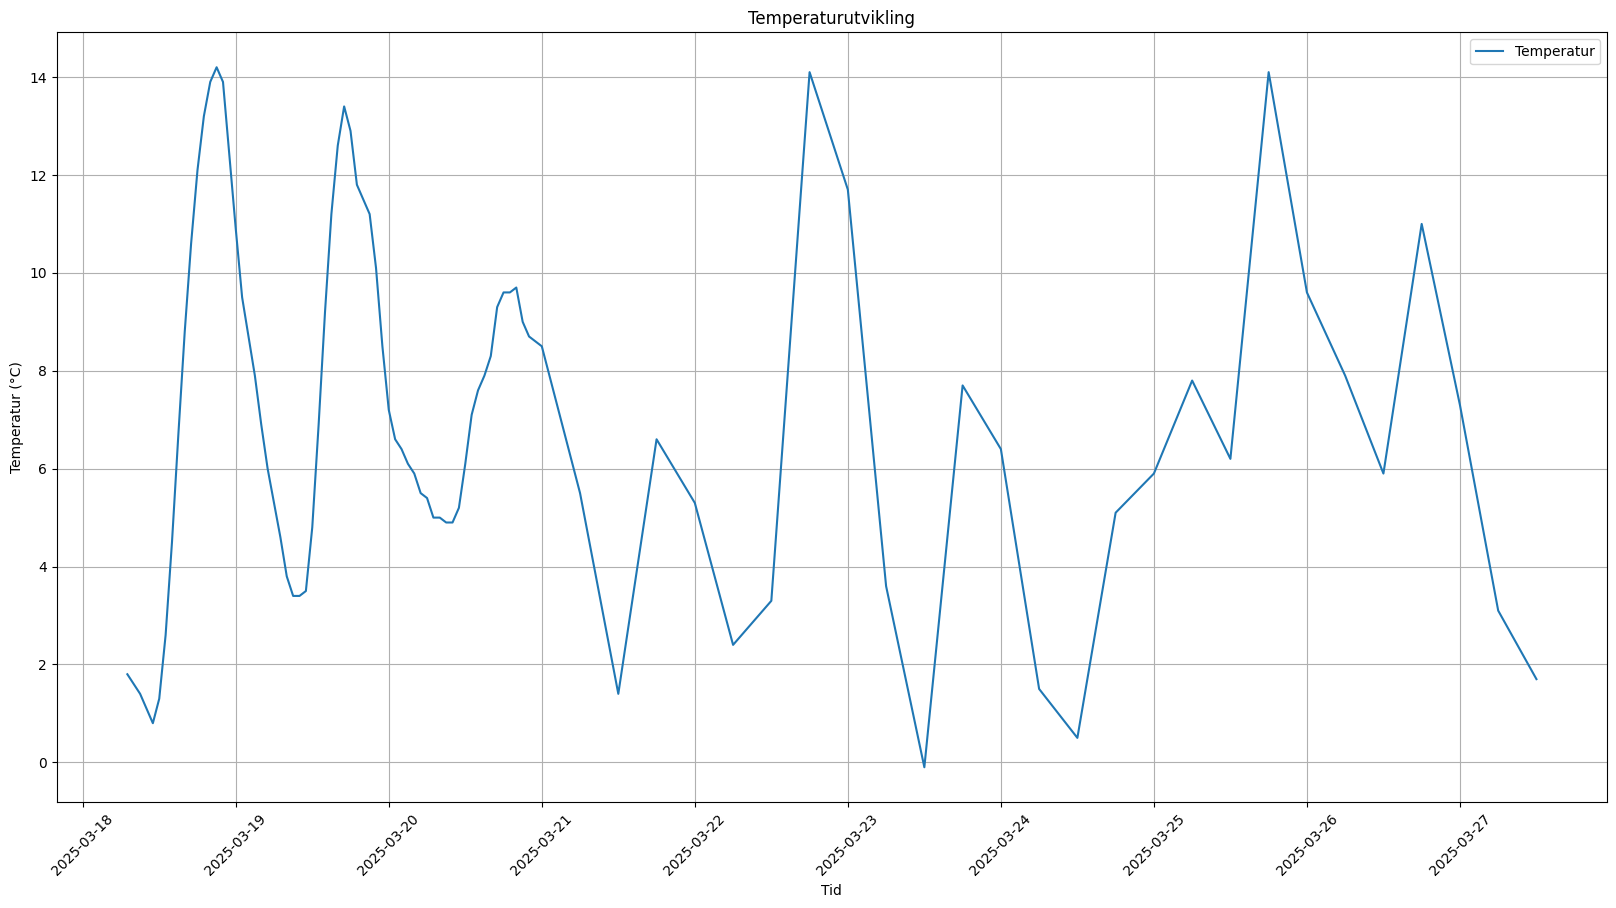

In [6]:
df["time"] = pd.to_datetime(df["time"])  # Konvertere tid til datetime-format
plt.figure(figsize=(20,10))
plt.plot(df["time"], df["temperature"], label="Temperatur")
plt.xlabel("Tid")
plt.ylabel("Temperatur (°C)")
plt.title("Temperaturutvikling")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()
